# Actividad Integradora 
**Habilidades Intermedias para Analista de datos**</br>
*Módulo 1: Fundamentos de Matemáticas y Estadística para el Análisis de Datos</br>
Atenea - Agencia Distrital para la Educación Superior, la Ciencia y la Tecnología* | *Alcaldía Mayor de Bogotá*</br>
*Universidad de los Andes* | *Facultad de Economía* | *Educación Continua*</br>
</br>
*Abril de 2023*

<sub>* Ejercicio de simulación pedagógica diseñado para el entrenamiento de competencias de análisis descriptivo de datos.</sub>


## Caso integrador
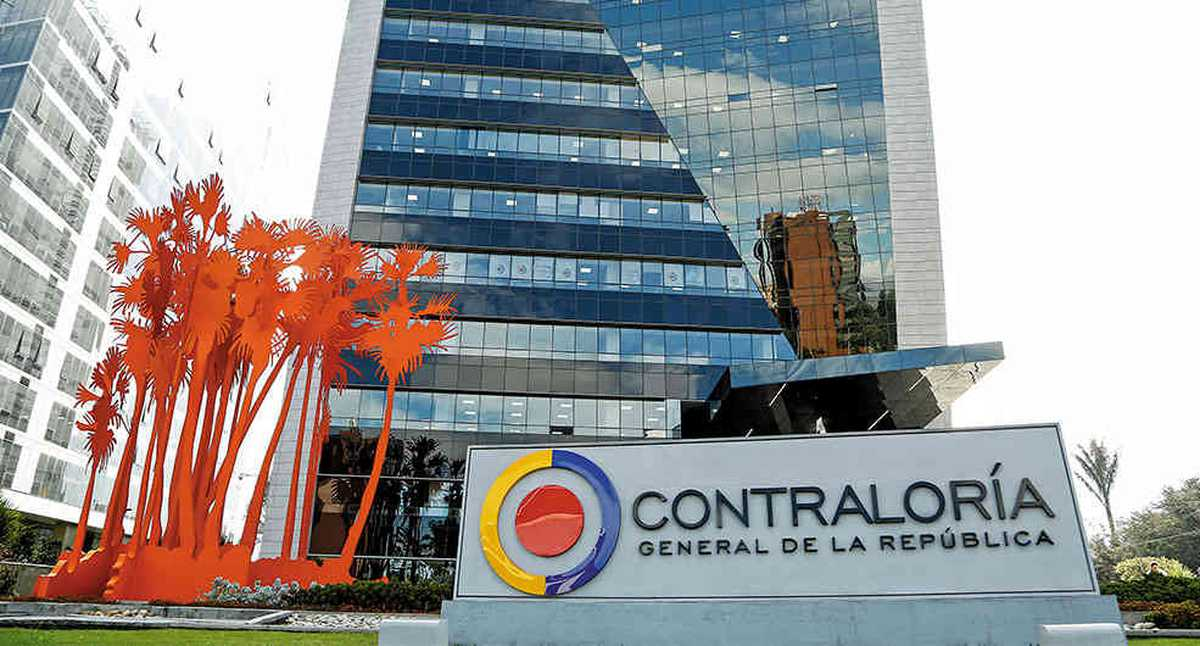

* Para este caso problema, usted hace parte de un equipo de analítica de la **Contraloría General de la República**. 
* Les han pedido contribuir al **Informe de Avance Fiscal** para este periodo.
* En este momento su equipo se encuentra explorando los datos de contratación del **Ministerio de Salud y Protección Social**.
* Antes de comenzar a revisar el nivel de ejecución, el objetivo de este análisis es **caracterizar a grandes rasgos** los contratos celebrados por el Ministerio.
* Así mismo, le piden anotar cualquier **conclusión o aprendizaje** que considere notable sobre los contratos registrados.

Lo anterior tiene el espíritu de **generar insumos para comprender mejor la forma en que las entidades públicas** asignan sus contratos, y eventualmente abrir conversaciones al respecto. Por lo pronto, este es un ejercicio exploratorio que será replicado en otras entidades del Estado para comprender las diferencias en las características de sus contrataciones.

A continuación, se le provee una muestra de contratos del Ministerio. Por favor formule un **ejercicio exploratorio** que involucre una descripción general de los datos y potencialmente permita concluir sobre todos los contratos celebrados por la entidad. Para esto tenga en cuenta el uso de herramientas de **estadística descriptiva** y potencialmente de **inferencia estadística** sobre la población de contratos. 

Recuerde ser coherente en sus conclusiones y **lógicamente consistente** con la información que utiliza.


## Contexto del dataset

A continuación, se presenta una base de datos extraída de la plataforma de Datos Abiertos del SECOP II. Esta base de datos contiene todas las compras realizadas por el Ministerio De Salud y Protección Social durante los años 2018 y 2019 con cargo a recursos públicos.

Esta información es cargada por la propia entidad y es susceptible a tener errores de digitación o de calidad de la información.

A continuación, se presenta un diccionario de los datos con una breve descripción de la información presente en cada columna.

## Diccionario de datos

|Variable|Descripción
|---|---|
|Nombre Entidad|Nombre de la Entidad que realiza la contratación.|
|Nit Entidad|NIT de la Entidad que realiza la contratación.|
|Departamento|Departamento de la Entidad que realiza la contratación.|
|Localización|Ubicación de la Entidad que realiza la contratación.|
|Orden|Define si la Entidad es de Orden Territorial o Nacional.|
|Sector|Sector de la Entidad.|
|Proceso de Compra|Código del proceso precontractual que asigna la plataforma SECOP II.|
|ID Contrato|Código del contrato asignado por la plataforma SECOP II.|
|Referencia del Contrato|Código del contrato asignado por la Entidad (Este código se puede repetir entre entidades, pero en teoría no se debería repetir dentro de la misma entidad).|
|Estado Contrato|Etapa en la que se encuentra el contrato o estado en el que cerró.|
|Codigo de Categoria Principal|Código del bienes y servicios de las Naciones Unidas que agrupa y clasifica el objeto a contratar.|
|Descripcion del Proceso|Descripción de la entidad sobre el objeto, bien o servicio a contratar.|
|Tipo de Contrato|Tipo contrato realizado.|
|Modalidad de Contratacion|Modalidad de contratación por la cual se realiza el proceso.|
|Justificacion Modalidad de Contratacion|Justificación de la modalidad de contratación.|
|Fecha de Firma|Fecha en la que se firma el contrato (formato MM/DD/AAAA).|
|Año Firma|Año de la firma del contrato.|
|TipoDocProveedor|Tipo de documento del proveedor, puede ser NIT, CC, entre otros.|
|Documento Proveedor|Número de documento del proveedor.|
|Proveedor Adjudicado|Nombre del proveedor.|
|Es Grupo|Muestra si el proveedor es un grupo temporal de varios proveedores. Incluye, uniones temporales, consorcios, entre otros.|
|Es Pyme|Indica si el proveedor es MiPymes.|
|Valor del Contrato|Valor final del contrato.|
|Nombre Representante Legal|Nombre del representante legal del proveedor. En caso de ser una persona natural, debería ser la misma información que el nombre del proveedor.|
|Tipo de Identificación Representante Legal|Tipo de documento que identifica al representante legal.|
|Identificación Representante Legal|Identificación del representante legal.|
|Género Representante Legal|Género del representante legal.|


## Ejemplo para la actividad integradora


### Preparación 

In [1]:
from google.colab import drive # conectar con google drive
from google.colab import files # cargar archivos
import pandas as pd # manejo de data frames
import seaborn as sns # visualización
import matplotlib.pyplot as plt
import numpy as np # 
import io
import scipy.stats # distribuciones estadísticas 


In [2]:
### Carga de datos
uploaded = files.upload()

Saving MinSalud 2018-2019.xlsx to MinSalud 2018-2019.xlsx


In [3]:
# La base la nombramos df
df = pd.read_excel(io.BytesIO(uploaded['MinSalud 2018-2019.xlsx']))

In [4]:
# Visualización de la base de datos
display(df)

,Nombre Entidad,Nit Entidad,Departamento,Localización,Orden,Sector,Proceso de Compra,ID Contrato,Referencia del Contrato,Estado Contrato,...,TipoDocProveedor,Documento Proveedor,Proveedor Adjudicado,Es Grupo,Es Pyme,Valor del Contrato,Nombre Representante Legal,Tipo de Identificación Representante Legal,Identificación Representante Legal,Género Representante Legal
0,MINISTERIO DE SALUD Y PROTECCIÓN SOCIAL,900474727,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Salud y Protección Social,CO1.BDOS.283298,CO1.PCCNTR.272198,MSPS-001-2018,Modificado,...,Cédula de Ciudadanía,9.341261e+07,Julio Ernesto Calderon Agudelo,No,No,95069100,Julio Ernesto Calderon Agudelo,Sin Descripcion,93412609,No Definido
1,MINISTERIO DE SALUD Y PROTECCIÓN SOCIAL,900474727,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Salud y Protección Social,CO1.BDOS.227047,CO1.PCCNTR.229548,MSPS-745-2017,Cerrado,...,No Definido,9.009715e+09,SUPPLER SAS,No,Si,4070000,ANGELA MARCELA GOMEZ TRIANA,Sin Descripcion,1022947718,No Definido
2,MINISTERIO DE SALUD Y PROTECCIÓN SOCIAL,900474727,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Salud y Protección Social,CO1.BDOS.266158,CO1.PCCNTR.254393,MSPS-1013-2017,Modificado,...,Cédula de Ciudadanía,8.020628e+07,JOSE LUIS GAMBOA BENAVIDES,No,No,39375000,JOSE LUIS GAMBOA BENAVIDES,Sin Descripcion,80206280,No Definido
3,MINISTERIO DE SALUD Y PROTECCIÓN SOCIAL,900474727,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Salud y Protección Social,CO1.BDOS.266661,CO1.PCCNTR.259301,MSPS-1028-2017,Modificado,...,Cédula de Ciudadanía,1.019018e+09,ANA MARIA HERRERA ESLAVA,No,Si,63000000,BOGOTA,Sin Descripcion,Sin Descripcion,No Definido
4,MINISTERIO DE SALUD Y PROTECCIÓN SOCIAL,900474727,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Salud y Protección Social,CO1.BDOS.267721,CO1.PCCNTR.261010,MSPS-1043-2017,Modificado,...,Cédula de Ciudadanía,1.016052e+09,Alvaro Andrés Morales Montenegro,No,No,39640392,Alvaro Andrés Morales Montenegro,Sin Descripcion,1016052147,No Definido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,MINISTERIO DE SALUD Y PROTECCIÓN SOCIAL,900474727,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Salud y Protección Social,CO1.BDOS.948605,CO1.PCCNTR.1206621,MSPS-902-2019,Modificado,...,No Definido,9.001036e+08,Información de medios para Colombia SAS,No,No,25800200,Nancy Carolina Alejo Suarez,Sin Descripcion,52215261,No Definido
1257,MINISTERIO DE SALUD Y PROTECCIÓN SOCIAL,900474727,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Salud y Protección Social,CO1.BDOS.990004,CO1.PCCNTR.1214104,MSPS-963-2019,Activo,...,No Definido,8.001920e+08,INPEL SA,No,No,43584692,MARIA JULIANA ARANGO GOMEZ,Sin Descripcion,38557791,No Definido
1258,MINISTERIO DE SALUD Y PROTECCIÓN SOCIAL,900474727,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Salud y Protección Social,CO1.BDOS.956703,CO1.PCCNTR.1218220,MSPS-1017-2019,Modificado,...,No Definido,9.005555e+08,PROYECTAMOS COLOMBIA SAS,No,Si,1141800000,Carol Andrea Niño Suarez,Sin Descripcion,52711447,No Definido
1259,MINISTERIO DE SALUD Y PROTECCIÓN SOCIAL,900474727,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Salud y Protección Social,CO1.BDOS.982842,CO1.PCCNTR.1240440,MSPS-1173-2019,Modificado,...,No Definido,9.005555e+08,PROYECTAMOS COLOMBIA SAS,No,Si,1049650000,Carol Andrea Niño Suarez,Sin Descripcion,52711447,No Definido


### Caracterización y exploración

Hagamos una exploración inicial de los datos con algunos métodos de Pandas.

Con esto podemos tener una mejor idea de los datos que tenemos y la calidad de la información.

**¿Cuantas filas y columnas tiene la base de datos?**

In [5]:
print('Filas: ', df.shape[0])
print('Columnas: ', df.shape[1])

Filas:  1261
Columnas:  27


**Validemos nuestras variables de acuerdo al diccionario de datos:**

In [6]:
df.columns

Index(['Nombre Entidad', 'Nit Entidad', 'Departamento', 'Localización',
       'Orden', 'Sector', 'Proceso de Compra', 'ID Contrato',
       'Referencia del Contrato', 'Estado Contrato',
       'Codigo de Categoria Principal', 'Descripcion del Proceso',
       'Tipo de Contrato', 'Modalidad de Contratacion',
       'Justificacion Modalidad de Contratacion', 'Fecha de Firma',
       'Año Firma', 'TipoDocProveedor', 'Documento Proveedor',
       'Proveedor Adjudicado', 'Es Grupo', 'Es Pyme', 'Valor del Contrato',
       'Nombre Representante Legal',
       'Tipo de Identificación Representante Legal',
       'Identificación Representante Legal', 'Género Representante Legal'],
      dtype='object')

**¿Cuales son los tipos de datos que tenemos en nuestra base de datos?**

La función `df.info()` nos permite conocer el tipo de dato en el que es cargado la base y adicional conocer si existen datos nulos en alguna de las variables

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 27 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Nombre Entidad                              1261 non-null   object        
 1   Nit Entidad                                 1261 non-null   int64         
 2   Departamento                                1261 non-null   object        
 3   Localización                                1261 non-null   object        
 4   Orden                                       1261 non-null   object        
 5   Sector                                      1261 non-null   object        
 6   Proceso de Compra                           1261 non-null   object        
 7   ID Contrato                                 1261 non-null   object        
 8   Referencia del Contrato                     1261 non-null   object        
 9   Estado C

Con lo anterior, todas las variables tienen datos. Y tenemos variables de tipo categorico, decimal, entero y fecha.

... Otra manera de conocer los tipos de datos...

In [8]:
df.dtypes

Nombre Entidad                                        object
Nit Entidad                                            int64
Departamento                                          object
Localización                                          object
Orden                                                 object
Sector                                                object
Proceso de Compra                                     object
ID Contrato                                           object
Referencia del Contrato                               object
Estado Contrato                                       object
Codigo de Categoria Principal                         object
Descripcion del Proceso                               object
Tipo de Contrato                                      object
Modalidad de Contratacion                             object
Justificacion Modalidad de Contratacion               object
Fecha de Firma                                datetime64[ns]
Año Firma               

In [9]:
cualicolumns=df.select_dtypes(exclude=['int64','float64','datetime64']).columns
cuanticolumns=df.select_dtypes(exclude=['object','datetime64']).columns
fechacolumns=df.select_dtypes(exclude=['object','float64','int64']).columns

In [10]:
print('El número de variables categóricas es de: ', len(cualicolumns)),
print('El número de variables cuantitativas es de: ', len(cuanticolumns)),
print('El número de variables tipo fecha es de: ', len(fechacolumns))

El número de variables categóricas es de:  22
El número de variables cuantitativas es de:  4
El número de variables tipo fecha es de:  1


La función `df.head()` nos permite visualizar los 5 primeros registros por defecto y la función `df.tail()` los últimos 5 registros.

**-Pruebe las funciones anteriormente mencionadas**

**-Después de conocer los tipos de datos cargados en python y la visualización de las variables. Clasifique los tipos de datos de cada variable entre a.Cualitativa (Nominales, Ordinales) b.Cuantitativa (Discretas, Continuas)**

In [11]:
df.head()


,Nombre Entidad,Nit Entidad,Departamento,Localización,Orden,Sector,Proceso de Compra,ID Contrato,Referencia del Contrato,Estado Contrato,...,TipoDocProveedor,Documento Proveedor,Proveedor Adjudicado,Es Grupo,Es Pyme,Valor del Contrato,Nombre Representante Legal,Tipo de Identificación Representante Legal,Identificación Representante Legal,Género Representante Legal
0,MINISTERIO DE SALUD Y PROTECCIÓN SOCIAL,900474727,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Salud y Protección Social,CO1.BDOS.283298,CO1.PCCNTR.272198,MSPS-001-2018,Modificado,...,Cédula de Ciudadanía,9.341261e+07,Julio Ernesto Calderon Agudelo,No,No,95069100,Julio Ernesto Calderon Agudelo,Sin Descripcion,93412609,No Definido
1,MINISTERIO DE SALUD Y PROTECCIÓN SOCIAL,900474727,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Salud y Protección Social,CO1.BDOS.227047,CO1.PCCNTR.229548,MSPS-745-2017,Cerrado,...,No Definido,9.009715e+09,SUPPLER SAS,No,Si,4070000,ANGELA MARCELA GOMEZ TRIANA,Sin Descripcion,1022947718,No Definido
2,MINISTERIO DE SALUD Y PROTECCIÓN SOCIAL,900474727,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Salud y Protección Social,CO1.BDOS.266158,CO1.PCCNTR.254393,MSPS-1013-2017,Modificado,...,Cédula de Ciudadanía,8.020628e+07,JOSE LUIS GAMBOA BENAVIDES,No,No,39375000,JOSE LUIS GAMBOA BENAVIDES,Sin Descripcion,80206280,No Definido
3,MINISTERIO DE SALUD Y PROTECCIÓN SOCIAL,900474727,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Salud y Protección Social,CO1.BDOS.266661,CO1.PCCNTR.259301,MSPS-1028-2017,Modificado,...,Cédula de Ciudadanía,1.019018e+09,ANA MARIA HERRERA ESLAVA,No,Si,63000000,BOGOTA,Sin Descripcion,Sin Descripcion,No Definido
4,MINISTERIO DE SALUD Y PROTECCIÓN SOCIAL,900474727,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Salud y Protección Social,CO1.BDOS.267721,CO1.PCCNTR.261010,MSPS-1043-2017,Modificado,...,Cédula de Ciudadanía,1.016052e+09,Alvaro Andrés Morales Montenegro,No,No,39640392,Alvaro Andrés Morales Montenegro,Sin Descripcion,1016052147,No Definido


In [12]:
df.tail()


,Nombre Entidad,Nit Entidad,Departamento,Localización,Orden,Sector,Proceso de Compra,ID Contrato,Referencia del Contrato,Estado Contrato,...,TipoDocProveedor,Documento Proveedor,Proveedor Adjudicado,Es Grupo,Es Pyme,Valor del Contrato,Nombre Representante Legal,Tipo de Identificación Representante Legal,Identificación Representante Legal,Género Representante Legal
1256,MINISTERIO DE SALUD Y PROTECCIÓN SOCIAL,900474727,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Salud y Protección Social,CO1.BDOS.948605,CO1.PCCNTR.1206621,MSPS-902-2019,Modificado,...,No Definido,900103639.0,Información de medios para Colombia SAS,No,No,25800200,Nancy Carolina Alejo Suarez,Sin Descripcion,52215261,No Definido
1257,MINISTERIO DE SALUD Y PROTECCIÓN SOCIAL,900474727,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Salud y Protección Social,CO1.BDOS.990004,CO1.PCCNTR.1214104,MSPS-963-2019,Activo,...,No Definido,800191973.0,INPEL SA,No,No,43584692,MARIA JULIANA ARANGO GOMEZ,Sin Descripcion,38557791,No Definido
1258,MINISTERIO DE SALUD Y PROTECCIÓN SOCIAL,900474727,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Salud y Protección Social,CO1.BDOS.956703,CO1.PCCNTR.1218220,MSPS-1017-2019,Modificado,...,No Definido,900555513.0,PROYECTAMOS COLOMBIA SAS,No,Si,1141800000,Carol Andrea Niño Suarez,Sin Descripcion,52711447,No Definido
1259,MINISTERIO DE SALUD Y PROTECCIÓN SOCIAL,900474727,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Salud y Protección Social,CO1.BDOS.982842,CO1.PCCNTR.1240440,MSPS-1173-2019,Modificado,...,No Definido,900555513.0,PROYECTAMOS COLOMBIA SAS,No,Si,1049650000,Carol Andrea Niño Suarez,Sin Descripcion,52711447,No Definido
1260,MINISTERIO DE SALUD Y PROTECCIÓN SOCIAL,900474727,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Salud y Protección Social,CO1.BDOS.960245,CO1.PCCNTR.1237437,MSPS-1230-2019,Cerrado,...,No Definido,830011157.0,MANUFACTURERA DE GRANDES COCINAS MGC CIA SAS,No,Si,387318418,JOSE JOAQUIN GONZALEZ,Sin Descripcion,19077608,No Definido


**Cualitativa**
*  **Nominal:** nombre entidad, nit entidad, departamento, localización, orden, sector, proceso de compra, ID contrato, referencia del contrato, estado contrato, código de categoría principal, descripción del proceso, modalidad de contratación, justificación modalidad de contratación, tipoDocProveedor, proveedor adjudicado, nombre representante legal, tipo de identificación representate legal, identificación representante legal
*  **Ordinal:** fecha de firma, es grupo, es pyme, género representante legal

**Cuantitativa**
*  **Discreta:** año firma, valor del contrato
*  **Continua:** 



**Resumen de los datos númericos**
La función `df.describe()` nos permite conocer un resumen de los datos númericos.

In [15]:
# Esto lo ejecutamos para visualizar los valores númericos sin notación cientifica
pd.options.display.float_format = '{:.2f}'.format 

In [26]:
df.describe()

,Nit Entidad,Año Firma,Documento Proveedor,Valor del Contrato,log_variable
count,1261.00,1261.00,1253.00,1261.00,1261.00
mean,900474727.00,2018.41,369922444.07,110023757.29,7.48
std,0.00,0.49,642937916.27,601904404.29,0.83
min,900474727.00,2018.00,52733.00,0.00,0.00
25%,900474727.00,2018.00,52022784.00,14232540.00,7.15
50%,900474727.00,2018.00,79332852.00,36132400.00,7.56
75%,900474727.00,2019.00,860535828.00,75163884.00,7.88
max,900474727.00,2019.00,9009714898.00,12257163715.00,10.09


**Analicemos**

Aunque los otros valores son cargados como tipo númerico no son objeto de análisis de medidas de tendencia central, esto dado que, son identificadores y años.

El valor promedio de los contratos que realiza el Ministerio de Salud es de 110 millones de pesos.  De manera análoga el percentil 50 o el 50% de los datos de los valores del contrato se encuentran por encima de $361 millones de pesos.

Existe uno o varios contratos con valor 0 y existe uno o varios contratos que superan el valor de $12.257 millones de pesos.

Los datos se encuentran dispersos con relación a la media en aproximadamente 600 millones de pesos.


**¿Que más puede decir del valor del contrato?**

El 75% de los contratos se encuentran por encima de $14.232 millones de pesos. 

El 25% de los contratos se encuentran por encima de $75.163 millones de pesos.

Dado que el resultado de la desviación estándar de este conjunto de datos tiene un valor muy elevado, se puede decir que los datos están muy dispersos y hay una gran variabilidad entre ellos. 

**Histograma de la variable Valor del contrato**

<ipython-input-27-d1355e408b61>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Valor del Contrato'], kde=False)


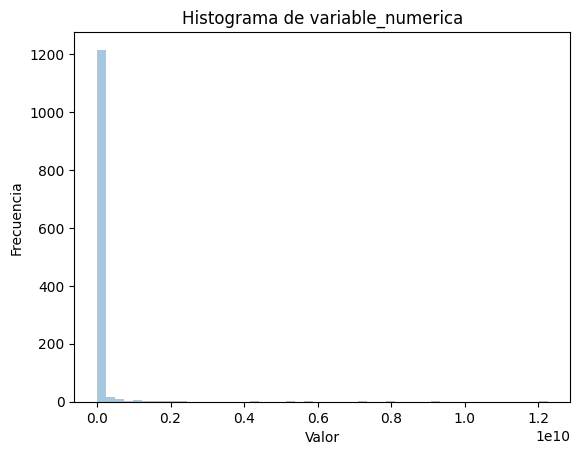

In [27]:
# Crea un histograma de la variable_numerica con seaborn
sns.distplot(df['Valor del Contrato'], kde=False)

# Agrega un título y etiquetas a los ejes
plt.title('Histograma de variable_numerica')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Muestra el histograma
plt.show()

**Histograma de la variable Valor del contrato, Logaritmo base 10**

<ipython-input-28-4dd9cd8b0d6a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['log_variable'], kde=False)


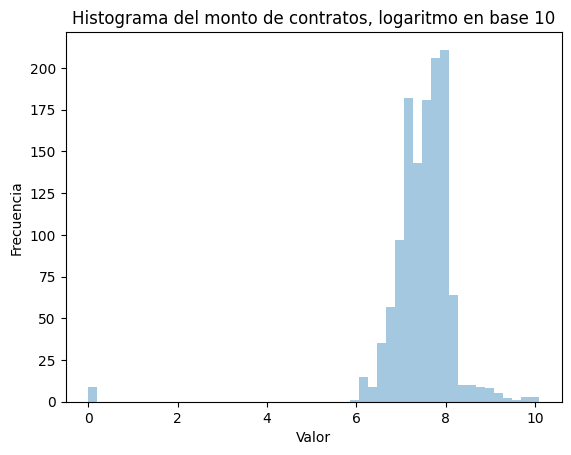

In [28]:
# Extraemos el logaritmo en base 10 al valor del contrato
df['log_variable'] = np.log10(df['Valor del Contrato']+1)
sns.distplot(df['log_variable'], kde=False)

# Agrega un título y etiquetas a los ejes
plt.title('Histograma del monto de contratos, logaritmo en base 10')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Muestra el histograma
plt.show()

**Con la gráfica anterior, ¿lo puede asociar a alguna distribución conocida en clase?**

LOG BASE 10: Distribución sesgada a la derecha

VARIABLE NUMÉRICA: Distribución exponencial

**Descripción de las variables categóricas**

In [29]:
df.describe(include = ['O'])

,Nombre Entidad,Departamento,Localización,Orden,Sector,Proceso de Compra,ID Contrato,Referencia del Contrato,Estado Contrato,Codigo de Categoria Principal,...,Modalidad de Contratacion,Justificacion Modalidad de Contratacion,TipoDocProveedor,Proveedor Adjudicado,Es Grupo,Es Pyme,Nombre Representante Legal,Tipo de Identificación Representante Legal,Identificación Representante Legal,Género Representante Legal
count,1261,1261,1261,1261,1261,1261,1261,1261,1261,1261,...,1261,1261,1261,1261,1261,1261,1261,1261,1261,1261
unique,1,1,1,1,1,1250,1261,1254,5,155,...,9,12,3,821,2,2,793,2,784,2
top,MINISTERIO DE SALUD Y PROTECCIÓN SOCIAL,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Salud y Protección Social,CO1.BDOS.878169,CO1.PCCNTR.272198,MSPS-715-2019,Activo,V1.85101701,...,Contratación directa,ServiciosProfesionales,Cédula de Ciudadanía,PERMODA LTDA,No,No,Sin Descripcion,Sin Descripcion,Sin Descripcion,No Definido
freq,1261,1261,1261,1261,1261,3,1,2,890,143,...,1139,1114,1088,6,1253,1128,42,1256,60,1256


**Recuerde que con df.value_counts() puede generar distribuciones de las variables**

In [30]:
df['Es Pyme'].value_counts() # Puede probar las distribuciones por otras variables

No    1128
Si     133
Name: Es Pyme, dtype: int64

In [33]:
# Frecuencia (% de participación)
df['Es Pyme'].value_counts()/len(df)*100

No   89.45
Si   10.55
Name: Es Pyme, dtype: float64

**Para poder ver variables de interés puede modificar o incluir las variables dentro del corchete cuadrado**

In [37]:
df.describe(include = ['O'])['Localización'] ### PARA EDITAR

count                         1261
unique                           1
top       Colombia, Bogotá, Bogotá
freq                          1261
Name: Localización, dtype: object

**¿Qué puede analizar con los resultados anteriores?**

**Boxplot del valor de contrato vs Tipo de contrato**

In [ ]:
sns.boxplot(x='Tipo de Contrato', y='Valor del Contrato', data=df)

# Gira los labels del eje x
plt.xticks(rotation=45)

# Muestra el boxplot
plt.show()

**¿Qué puede analizar con los resultados anteriores?**

**Boxplot del Valor de Contrato vs Modalidad de Contratación**

In [ ]:
sns.boxplot(x='Modalidad de Contratacion', y='Valor del Contrato', data=df)

# Gira los labels del eje x
plt.xticks(rotation=45)

# Muestra el boxplot
plt.show()

**¿Qué puede analizar con los resultados anteriores?**

**Sobre las variables que resulten de su interés exploren y analicen los resultados obtenidos**

### Probabilidad y probabilidad condicional

**¿Cual es la probabilidad de obtener un contrato de más de 200 Millones de pesos al seleccionar un contrato al azar?**




In [ ]:
#Probabilidad de obtener al azar un contrato de menos de 200 millones de pesos
# Cuenta la cantidad de registros en la columna 'Valor del contrato'
total_registros = df['Valor del Contrato'].count()
print(total_registros)

# total_registros mayores a 200 millones 
registros_mayor_200 = df[df['Valor del Contrato'] >200000000]['Valor del Contrato'].count()
print (registros_mayor_200)

# Probabilidad 
registros_mayor_200/total_registros

**¿Cual es la probabilidad de obtener un contrato de más de 200 Millones de pesos al filtrar Modalidad de Contratación, minima cuantía?**

In [ ]:
#Probabilidad de obtener al azar un contrato de más de 200 millones de pesos, cuando sea hace Selección abreviada de Menor Cuantía
# Cuenta la cantidad de registros en la columna 'Valor del contrato'
total_registros_menorcuantia = df[df['Modalidad de Contratacion'] == "Selección Abreviada de Menor Cuantía"]['Valor del Contrato'].count()
print(total_registros_menorcuantia)

# total_registros mayores a 200 millones pr 
contratos_mayor_200_menorcuantia = df.loc[(df['Valor del Contrato'] >200000000) & (df['Modalidad de Contratacion'] == 'Selección Abreviada de Menor Cuantía')]
registros_mayor_200_menorcuantia = contratos_mayor_200_menorcuantia['Valor del Contrato'].count()
print (registros_mayor_200_menorcuantia)

# Probabilidad 
registros_mayor_200_menorcuantia/total_registros_menorcuantia

**Analice los resultados obtenidos**

### Estimadores

¿Cual es el valor promedio de los contratos considerando todas las modalidades?
¿Cual es la varianza del monto de los contratos?

In [ ]:
# Estimador puntal del promedio
media_contratos = df['Valor del Contrato'].mean()

# Estimador puntual de la varianza 
var_contratos = np.var(df['Valor del Contrato'])

# Desviación estándar
desv_contratos  = var_contratos** 0.5

#
display(media_contratos)
display(var_contratos)
display(desv_contratos)

**Analice los resultados obtenidos y compare con los resultados obtenidos con la función df.describe() en el análisis de exploración de datos**

### Intervalos de confianza

Asuma que estos contratos son una muestra aleatoria de los diferentes contratos que se pudo generar. (Tanto la media como la varianza son desconocidas)

Determine el intervalo de confianza para el valor promedio de los contratos. 

Cual sería el intervalo de confianza para el monto promedio de los contratos. 

In [ ]:
from scipy.stats import t
import numpy as np

# Definir la muestra
n = len(df['Valor del Contrato'])

# Calcular la media muestral y la desviación estándar muestral
media = media_contratos
s = desv_contratos

# Definir el nivel de significancia y los grados de libertad
alpha = 0.05
gl = n - 1

# Calcular el valor crítico de la distribución t
t_critico = t.ppf(1 - alpha / 2, gl)

# Calcular el intervalo de confianza
intervalo = (media - t_critico * s / np.sqrt(n), media + t_critico * s / np.sqrt(n))

print("Intervalo de confianza del 95%:", intervalo)
print("Podemos asegurar con un 95% de confianza que el valor promedio de los contratos para esta entidad está en el rango:", intervalo)

**Analice los resultados obtenidos**

## Prueba de hipótesis 

Con los datos actuales, si se formula la hipótesis nula, el valor promedio de los contratos es igual a 70.000.000, ¿qué podría afirmar?

In [ ]:
# Definir el valor hipotético de la media poblacional
mu0 = 70000000

# Calcular el estadístico de prueba t
t_est = (media - mu0) / (s / np.sqrt(n))

# Calcular los grados de libertad y el valor crítico de t
gl = n - 1
t_critico = t.ppf(1 - 0.05/2, gl)

# Imprimir el resultado de la prueba de hipótesis
if t_est > t_critico or t_est < -t_critico:
    print("Se rechaza H0, la media poblacional es diferente de", mu0)
else:
    print("No se puede rechazar H0, la media poblacional es igual a", mu0)

**¿Que sucede si la Ho es que el valor promedio de los contratos es 78.000.000?**

**¿Que sucede si la Ho es que el valor promedio de los contratos es 150.000.000?**

**Analice los resultados**

## Conclusiones

**Plantee una pregunta de negocio adicional y respondala con los análisis realizados. Escriba sus conclusiones y recomendaciones**